In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Hospital_-_Data.csv')

In [3]:
del df["SL."]

In [4]:
df.head()

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,...,CREATININE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),COST OF IMPLANT,TOTAL COST TO HOSPITAL
0,58.0,M,MARRIED,other- heart,49.2,160,118,100.0,80.0,32,...,0.8,AMBULANCE,ALERT,EMERGENCY,25,12,13,Y,38000,660293.0
1,59.0,M,MARRIED,CAD-DVD,41.0,155,78,70.0,50.0,28,...,1.7,AMBULANCE,ALERT,EMERGENCY,41,20,21,Y,39690,809130.0
2,82.0,M,MARRIED,CAD-TVD,46.6,164,100,110.0,80.0,20,...,0.8,WALKED IN,ALERT,ELECTIVE,18,9,9,N,0,362231.0
3,46.0,M,MARRIED,CAD-DVD,80.0,173,122,110.0,80.0,24,...,1.5,AMBULANCE,ALERT,EMERGENCY,14,13,1,Y,89450,629990.0
4,60.0,M,MARRIED,CAD-DVD,58.0,175,72,180.0,100.0,18,...,1.9,AMBULANCE,ALERT,EMERGENCY,24,12,12,N,0,444876.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE                           248 non-null    float64
 1   GENDER                        248 non-null    object 
 2   MARITAL STATUS                248 non-null    object 
 3   KEY COMPLAINTS -CODE          212 non-null    object 
 4   BODY WEIGHT                   248 non-null    float64
 5   BODY HEIGHT                   248 non-null    int64  
 6   HR PULSE                      248 non-null    int64  
 7   BP -HIGH                      225 non-null    float64
 8   BP-LOW                        225 non-null    float64
 9   RR                            248 non-null    int64  
 10  PAST MEDICAL HISTORY CODE     75 non-null     object 
 11  HB                            246 non-null    float64
 12  UREA                          235 non-null    float64
 13  CREAT

In [11]:
df.columns

Index(['AGE', 'GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'PAST MEDICAL HISTORY CODE', 'HB', 'UREA', 'CREATININE',
       'MODE OF ARRIVAL', 'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN',
       'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD',
       'IMPLANT USED (Y/N)', 'COST OF IMPLANT', 'TOTAL COST TO HOSPITAL '],
      dtype='object')

count       248.000000
mean     198723.330282
std      122587.492984
min       46093.000000
25%      131652.750000
50%      162660.500000
75%      220614.000000
max      887350.000000
Name: TOTAL COST TO HOSPITAL , dtype: float64


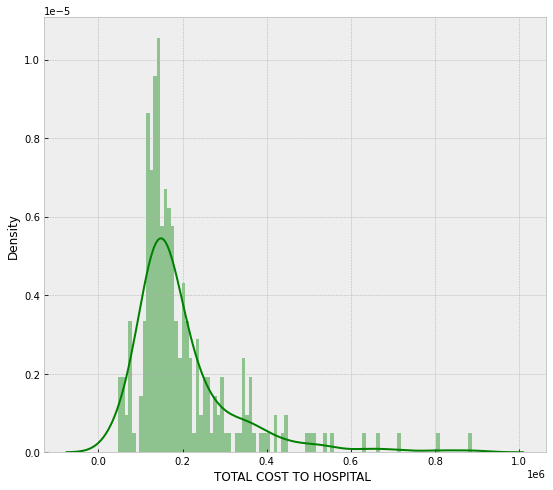

In [14]:
print(df["TOTAL COST TO HOSPITAL "].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df["TOTAL COST TO HOSPITAL "], color='g', bins=100, hist_kws={'alpha': 0.4});

In [15]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [16]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,AGE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT,TOTAL COST TO HOSPITAL
0,58.0,49.2,160,118,100.0,80.0,32,11.4,33.0,0.8,25,12,13,38000,660293.0
1,59.0,41.0,155,78,70.0,50.0,28,11.4,95.0,1.7,41,20,21,39690,809130.0
2,82.0,46.6,164,100,110.0,80.0,20,11.8,15.0,0.8,18,9,9,0,362231.0
3,46.0,80.0,173,122,110.0,80.0,24,11.8,74.0,1.5,14,13,1,89450,629990.0
4,60.0,58.0,175,72,180.0,100.0,18,10.0,48.0,1.9,24,12,12,0,444876.0


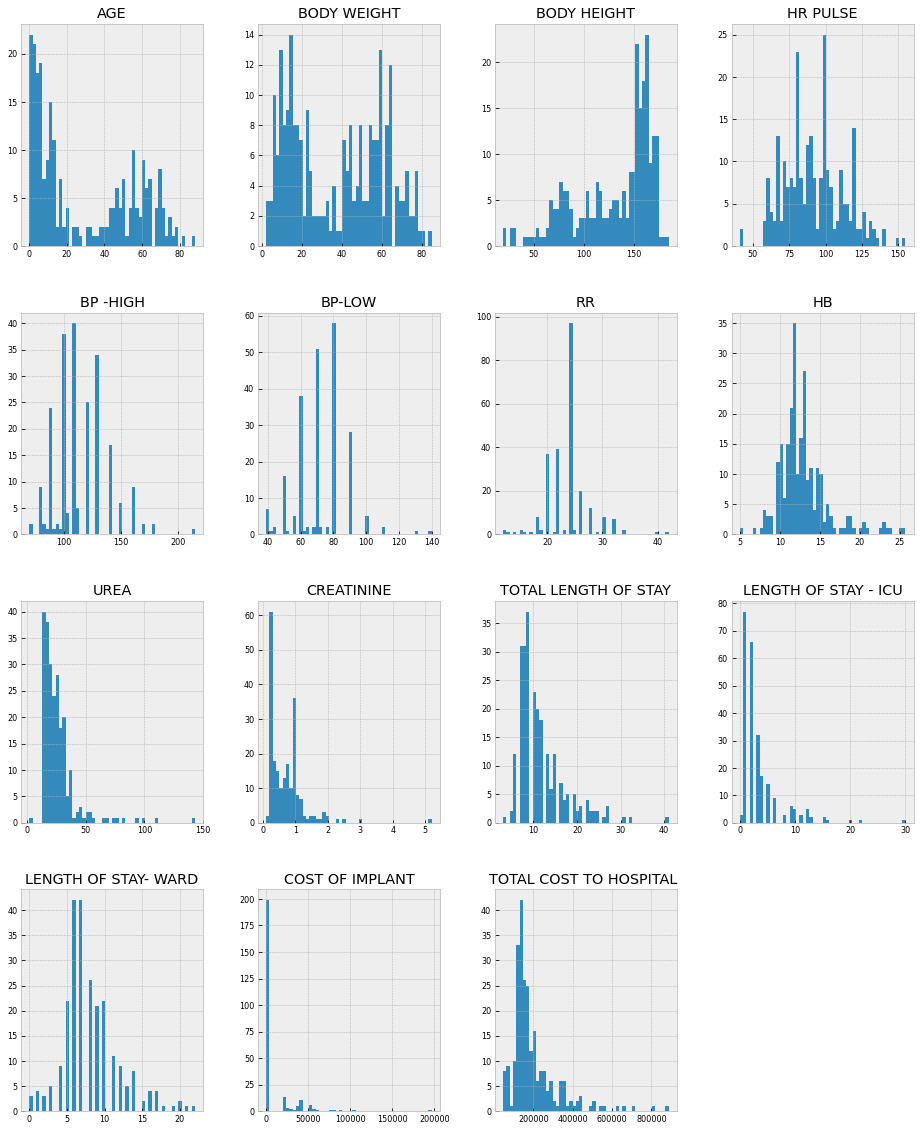

In [17]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [20]:
df_num_corr = df_num.corr()["TOTAL COST TO HOSPITAL "][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.4].sort_values(ascending=False)
print("There is {} strongly correlated values with TOTAL COST TO HOSPITAL:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with TOTAL COST TO HOSPITAL:
LENGTH OF STAY - ICU    0.821995
TOTAL LENGTH OF STAY    0.698709
COST OF IMPLANT         0.483825
AGE                     0.420697
Name: TOTAL COST TO HOSPITAL , dtype: float64


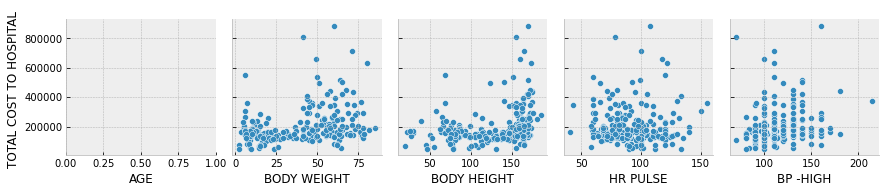

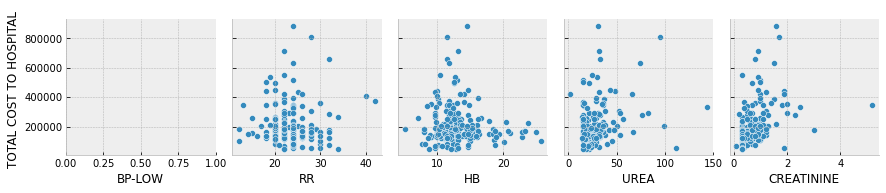

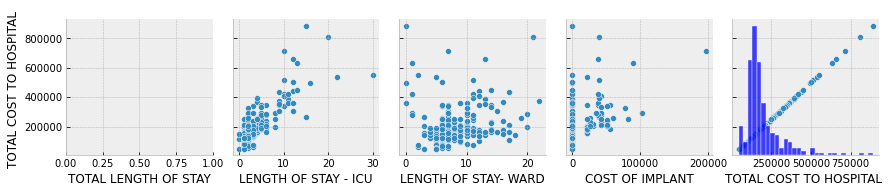

In [21]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['TOTAL COST TO HOSPITAL '])

In [23]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'TOTAL COST TO HOSPITAL ']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['TOTAL COST TO HOSPITAL '][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

             HB: -0.06160149102798924
       HR PULSE: -0.00853620775927426
             RR: 0.016180748370152768
         BP-LOW: 0.15819485025604466
       BP -HIGH: 0.1828760477936652
LENGTH OF STAY- WARD: 0.27437799841127153
           UREA: 0.2765806888888136
    BODY HEIGHT: 0.293827586816074
    BODY WEIGHT: 0.3482703961073433
     CREATININE: 0.3776108000415046
            AGE: 0.42069738347658175
COST OF IMPLANT: 0.4512646497178811
TOTAL LENGTH OF STAY: 0.6987089789451801
LENGTH OF STAY - ICU: 0.8210733874267441


In [25]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.4]
print("There is {} strongly correlated values with TOTAL COST TO HOSPITAL:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with TOTAL COST TO HOSPITAL:
['AGE', 'COST OF IMPLANT', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU']


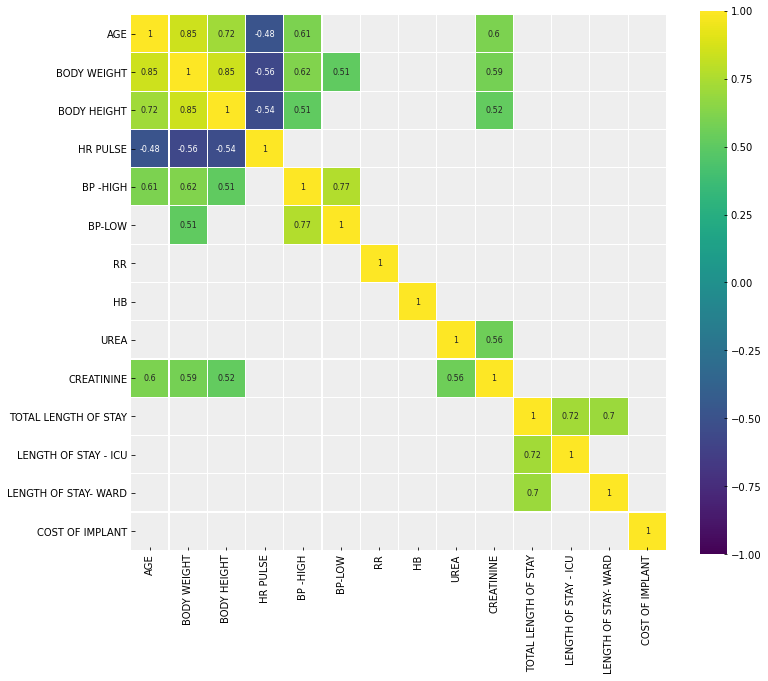

In [27]:
corr = df_num.drop('TOTAL COST TO HOSPITAL ', axis=1).corr() # We already examined TOTAL COST TO HOSPITAL correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);